In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [ ]:
# Missing values
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0].sort_values(ascending=False))

Missing values:
 Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64


In [5]:
# Fill missing categorical with mode
for col in ["Gender", "Married", "Dependents", "Self_Employed", "Credit_History", "Loan_Amount_Term"]:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\Subho\AppData\Local\Temp\ipykernel_2236\3020166631.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [6]:
# Fill LoanAmount with median
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

In [8]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Feature Engineering
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df["Income_Loan_Ratio"] = df["Total_Income"] / (df["LoanAmount"] + 1)

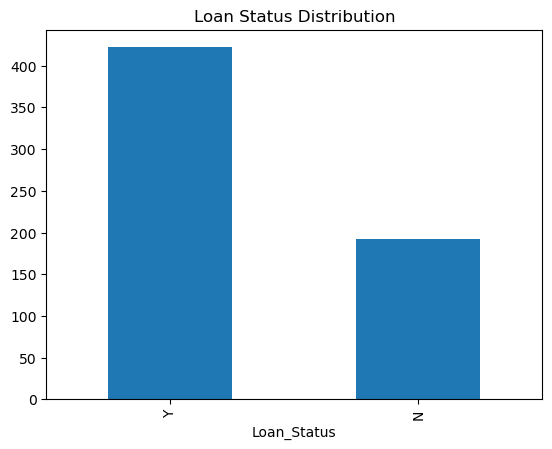

In [ ]:
# Loan status distribution
df["Loan_Status"].value_counts().plot(kind="bar", title="Loan Status Distribution")
plt.show()


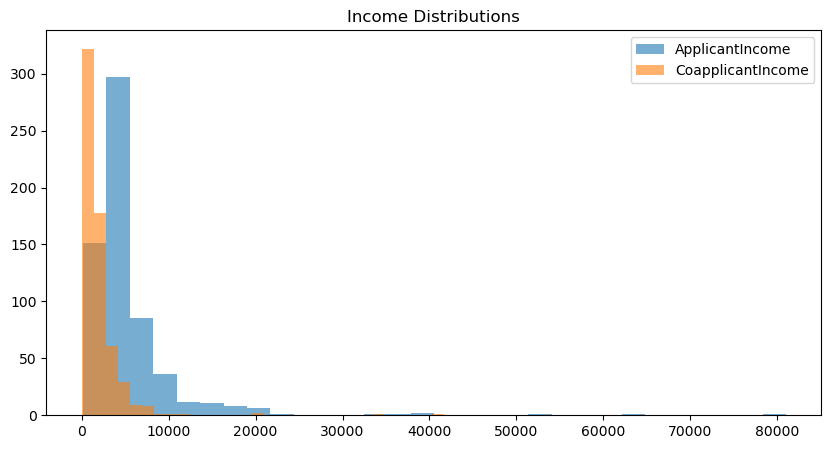

In [ ]:
# Income Distribution
plt.figure(figsize=(10,5))
plt.hist(df["ApplicantIncome"], bins=30, alpha=0.6, label="ApplicantIncome")
plt.hist(df["CoapplicantIncome"], bins=30, alpha=0.6, label="CoapplicantIncome")
plt.title("Income Distributions")
plt.legend()
plt.show()

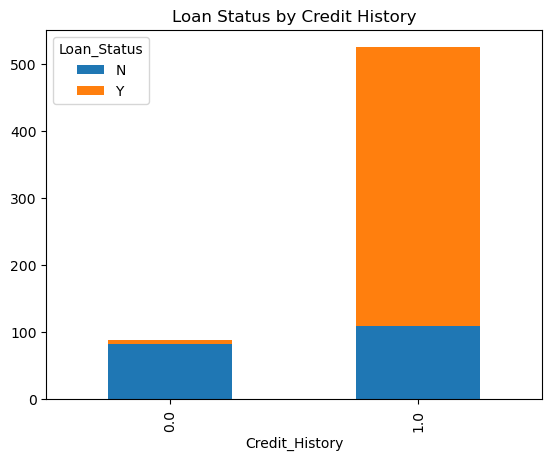

In [ ]:
# Credit history vs loan status
pd.crosstab(df["Credit_History"], df["Loan_Status"]).plot(kind="bar", stacked=True)
plt.title("Loan Status by Credit History")
plt.show()

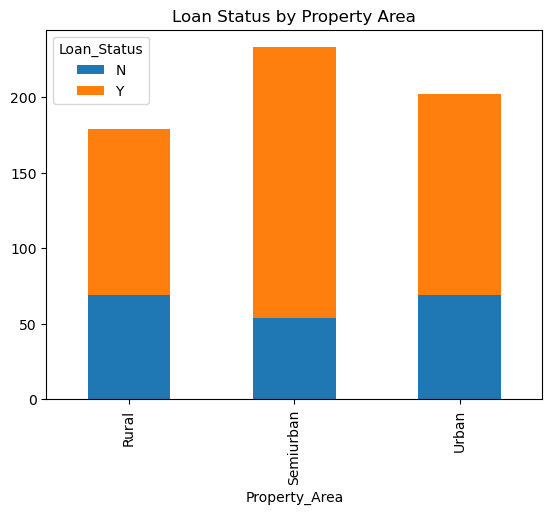

In [ ]:
# Property Area impact
pd.crosstab(df["Property_Area"], df["Loan_Status"]).plot(kind="bar", stacked=True)
plt.title("Loan Status by Property Area")
plt.show()

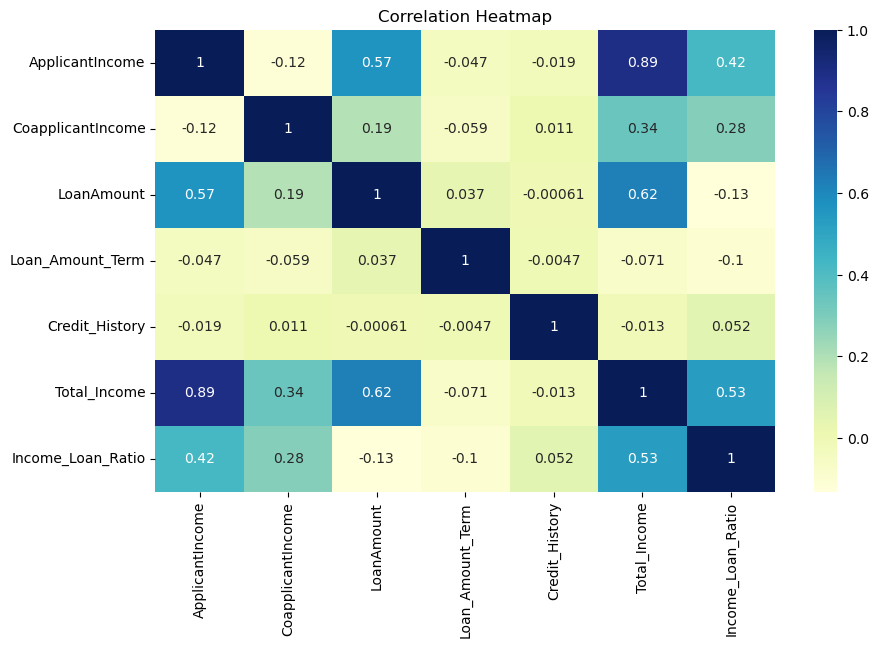

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Summary
print(" Key Insights:")
print("- Credit history is the strongest predictor of loan approval.")
print("- Applicants with good credit history have ~80%+ approval chances")
print("- Total income and income-loan ratio are useful features.")
print("- Urban and semiurban areas show higher loan approvals.")


 Key Insights:
- Credit history is the strongest predictor of loan approval.
- Applicants with good credit history have ~80%+ approval chances
- Total income and income-loan ratio are useful features.
- Urban and semiurban areas show higher loan approvals.
